# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [20]:
sim_dat = function(n, beta_0, beta_1, beta_2, beta_3){
    x = rnorm(n)
    e = rnorm(n)
    y = beta_0 + beta_1 * x + beta_2 * x^2 + beta_3 * x^3 + e
    return(data.frame(x, y))
}
sim_dat_res <- sim_dat(100, rnorm(1), rnorm(1), rnorm(1), rnorm(1)) 
head(sim_dat_res)

,x,y
,<dbl>,<dbl>
1,-0.06423187,0.1072808
2,0.09523735,1.0449072
3,2.91382194,17.0651861
4,-1.28872890,-1.4657030
5,-0.69849096,0.4948213
6,0.52725784,1.1957313


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [21]:
install.packages('leaps')
library(leaps)

regfit.full = regsubsets(y ~ poly(x, 10, raw = T), sim_dat_res, nvmax= 10)
regfit.summary = summary(regfit.full)

regfit.summary
attributes(regfit.summary)




The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//Rtmp5mxxOz/downloaded_packages


Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), sim_dat_res, nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  "*"                   " "                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"                  
4  ( 1 )  " "     

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 


The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//Rtmp5mxxOz/downloaded_packages


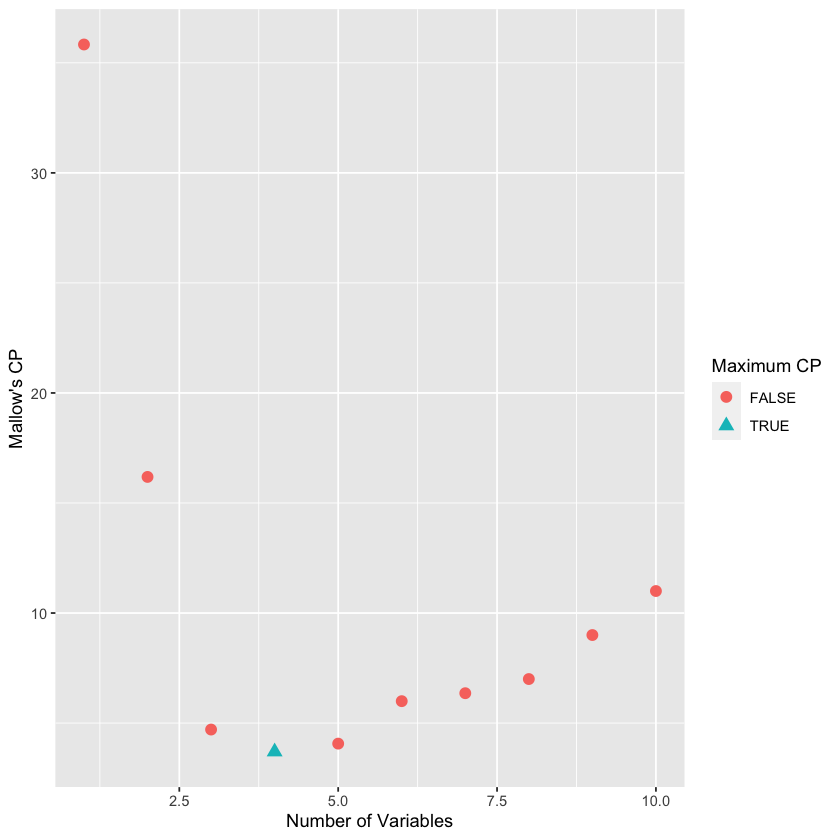

In [25]:
install.packages('ggplot2')
library(ggplot2)

numvar = 1:length(regfit.summary$rss)
allfalse = rep(FALSE,length(regfit.summary$rss))

#mallow's cp
cp.df = data.frame(numvar = numvar, cp = regfit.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfit.summary$cp)] = TRUE
ggplot(cp.df,aes(x = numvar,y = cp,shape = mincp,col = mincp)) + 
     geom_point(size = 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

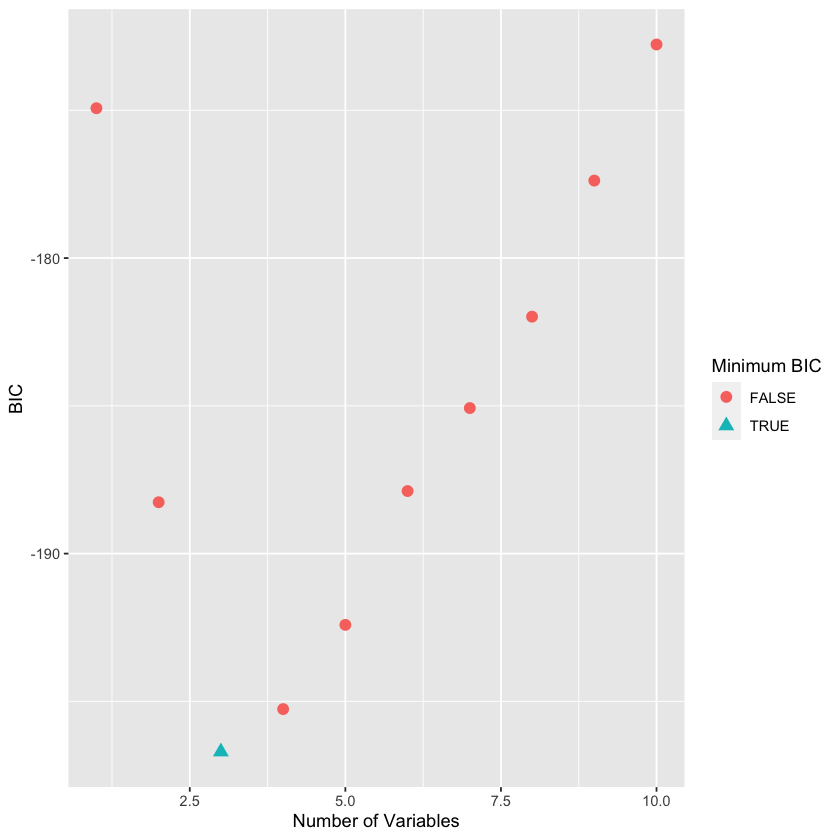

In [37]:
#BIC model
bic.df = data.frame(numvar = numvar, bic = regfit.summary$bic, minbic = allfalse)
bic.df$minbic[which.min(regfit.summary$bic)] = TRUE
ggplot(bic.df,aes(x = numvar, y = bic, shape = minbic, col = minbic)) + 
    geom_point(size = 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

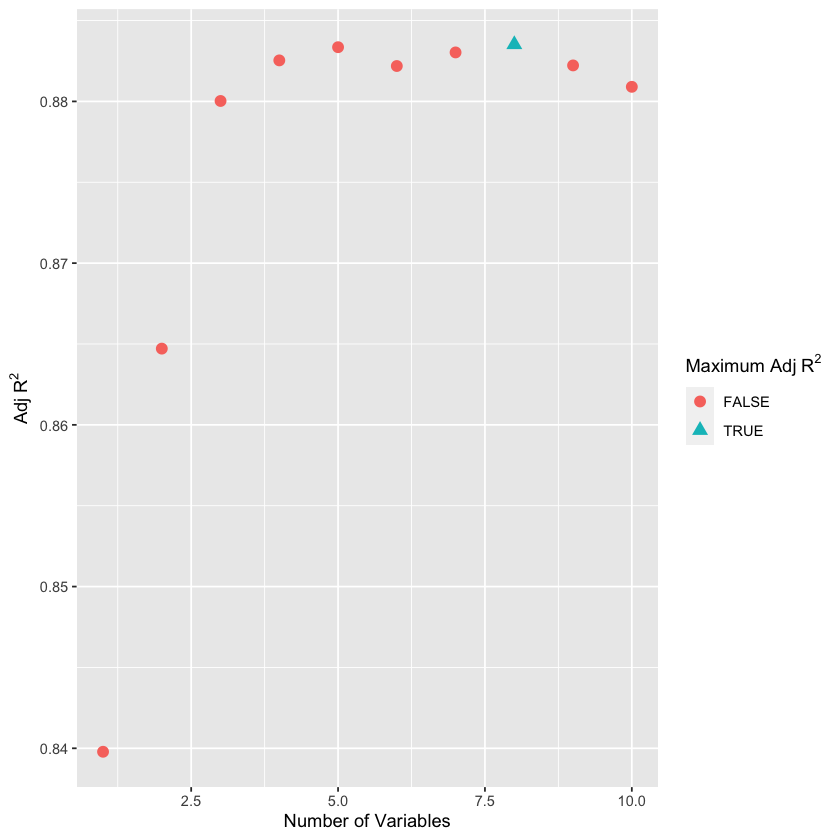

In [30]:
#Adj_R^2

adjr2.df = data.frame(numvar = numvar, adjr2 = regfit.summary$adjr2, maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(regfit.summary$adjr2)] = TRUE

ggplot(adjr2.df,aes(x = numvar,y = adjr2,shape = maxadjr2,col = maxadjr2)) + 
    geom_point(size = 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

> As seen above, the best model would be the model containing three predictor variables (specifically, the best as we know would be X, X2, and X3)
> 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [32]:
regfit.forward = regsubsets(y ~ poly(x, 10, raw = T), data = sim_dat_res, method = 'forward', nvmax = 10)

regfit_forward.summary = summary(regfit.forward)
regfit_forward.summary
attributes(regfit_forward.summary)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = sim_dat_res, 
    method = "forward", nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  "*"                   " "                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"        

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

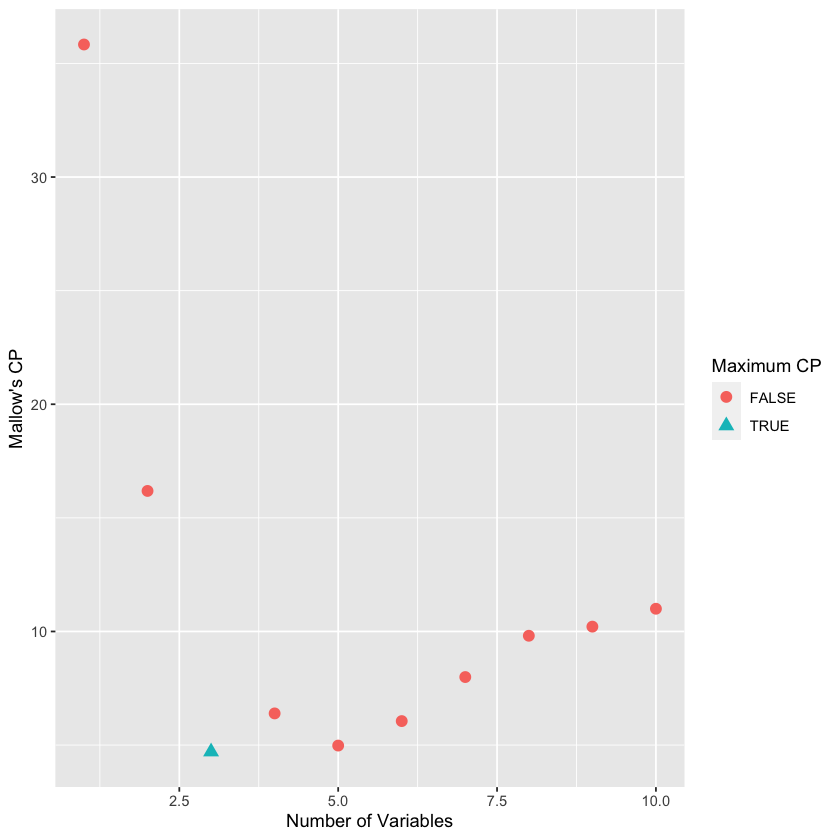

In [36]:
numvar = 1:length(regfit_forward.summary$rss)
allfalse = rep(FALSE,length(regfit_forward.summary$rss))

#Mallow's CP
cp.df = data.frame(numvar = numvar, cp = regfit_forward.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfit_forward.summary$cp)] = TRUE

ggplot(cp.df,aes(x = numvar,y = cp,shape = mincp,col = mincp)) + 
     geom_point(size = 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")



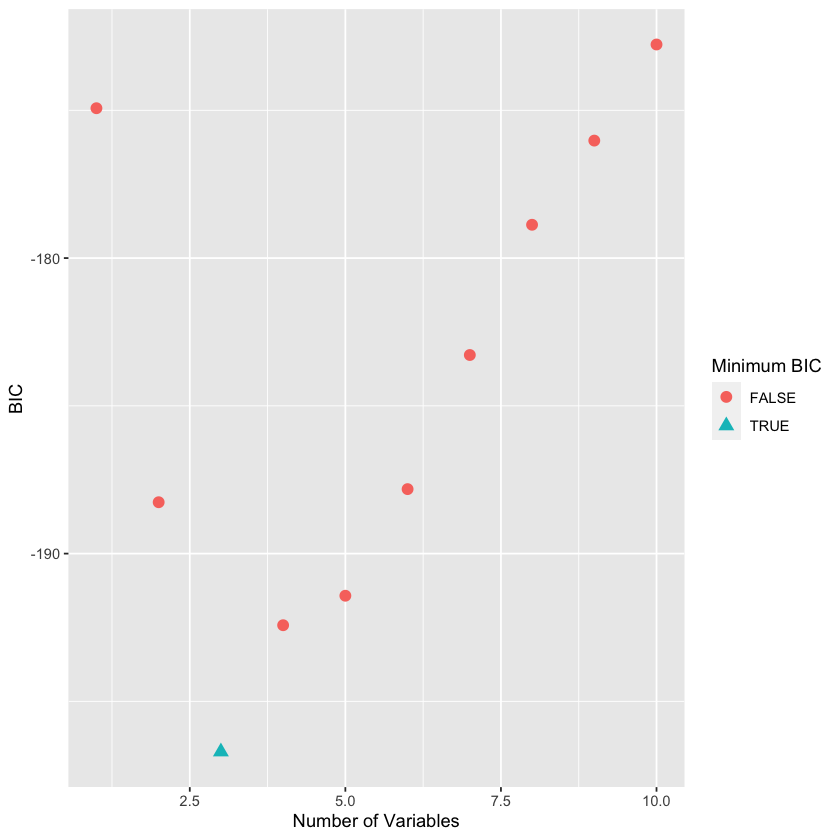

In [38]:
#BIC
bic.df = data.frame(numvar = numvar, bic = regfit_forward.summary$bic, minbic = allfalse)
bic.df$minbic[which.min(regfit_forward.summary$bic)] = TRUE
ggplot(bic.df,aes(x = numvar, y = bic, shape = minbic, col = minbic)) + 
    geom_point(size = 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

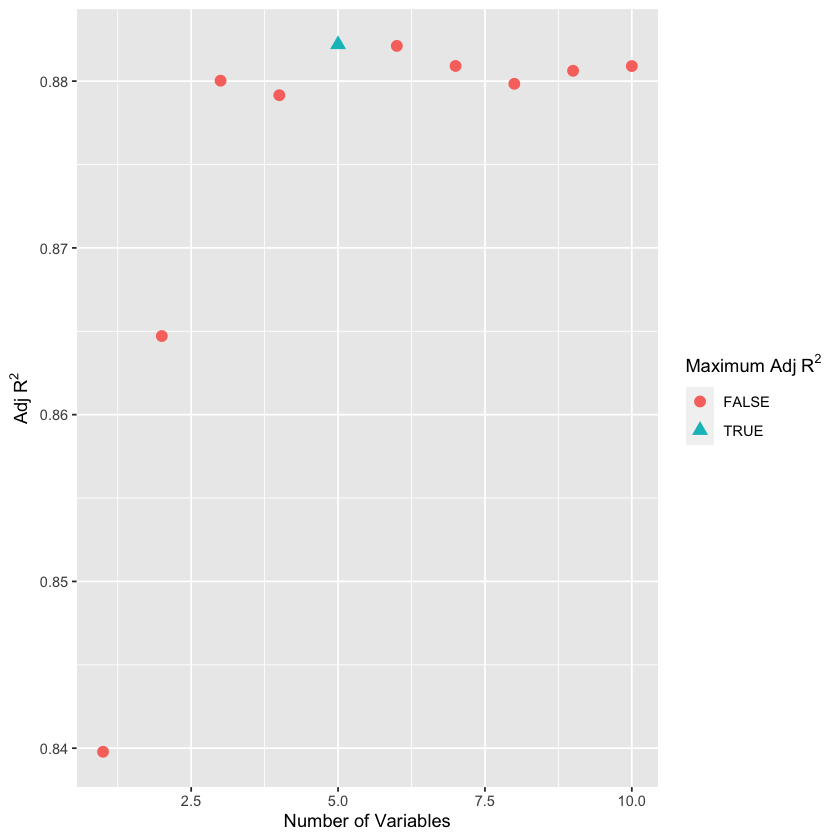

In [39]:
#Adj_R^2
adjr2.df = data.frame(numvar = numvar, adjr2 = regfit_forward.summary$adjr2, maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(regfit_forward.summary$adjr2)] = TRUE
ggplot(adjr2.df,aes(x = numvar,y = adjr2,shape = maxadjr2,col = maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

b) Backwards stepwise selection:

In [41]:
regfit.back = regsubsets(y ~ poly(x, 10, raw = T), data = sim_dat_res, method = 'backward', nvmax = 10)
regfit_back.summary = summary(regfit.back)
regfit_back.summary
attributes(regfit_back.summary)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = sim_dat_res, 
    method = "backward", nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  " "                   " "                   "*"                  
3  ( 1 )  " "                   " "                   "*"      

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

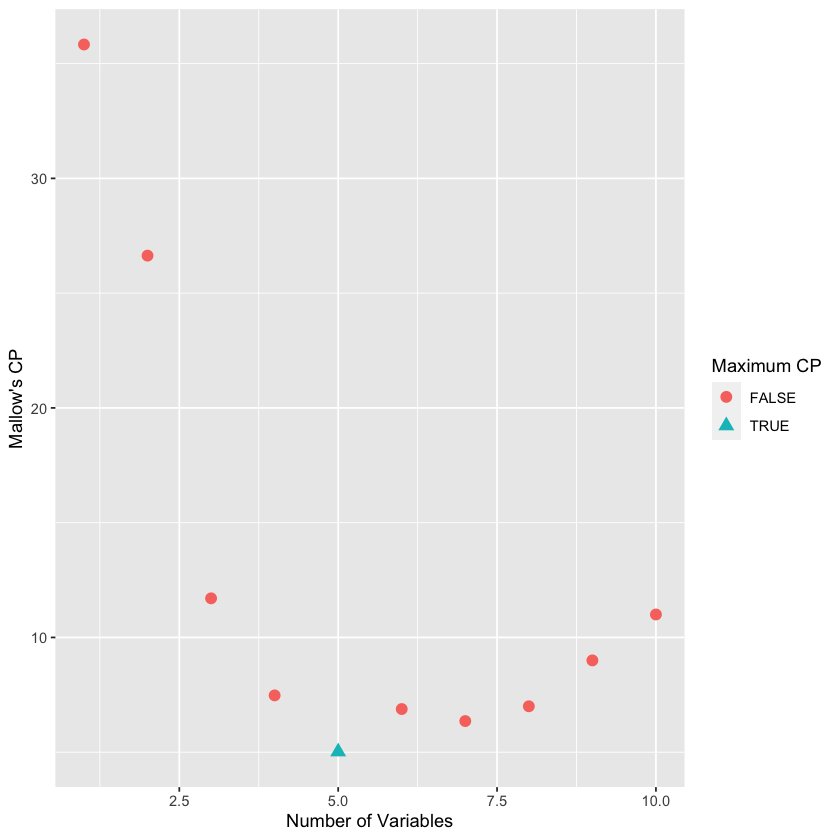

In [42]:
numvar = 1:length(regfit_back.summary$rss) 
allfalse = rep(FALSE,length(regfit_back.summary$rss)) 

#Mallow's CP
cp.df = data.frame(numvar = numvar, cp = regfit_back.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfit_back.summary$cp)] = TRUE

ggplot(cp.df,aes(x = numvar,y = cp,shape = mincp,col = mincp)) + 
     geom_point(size = 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

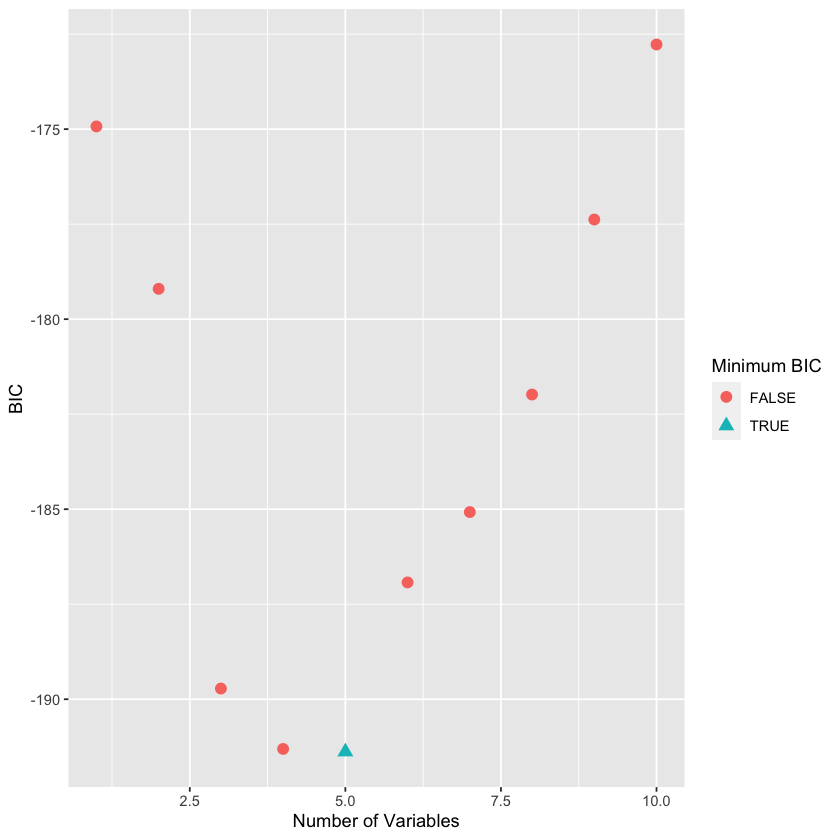

In [43]:
#BIC
bic.df = data.frame(numvar = numvar, bic = regfit_back.summary$bic, minbic = allfalse)
bic.df$minbic[which.min(regfit_back.summary$bic)] = TRUE
ggplot(bic.df,aes(x = numvar, y = bic, shape = minbic, col = minbic)) + 
    geom_point(size = 3) +  
    labs(x = "Number of Variables", y = "BIC", color = "Minimum BIC", shape = "Minimum BIC")

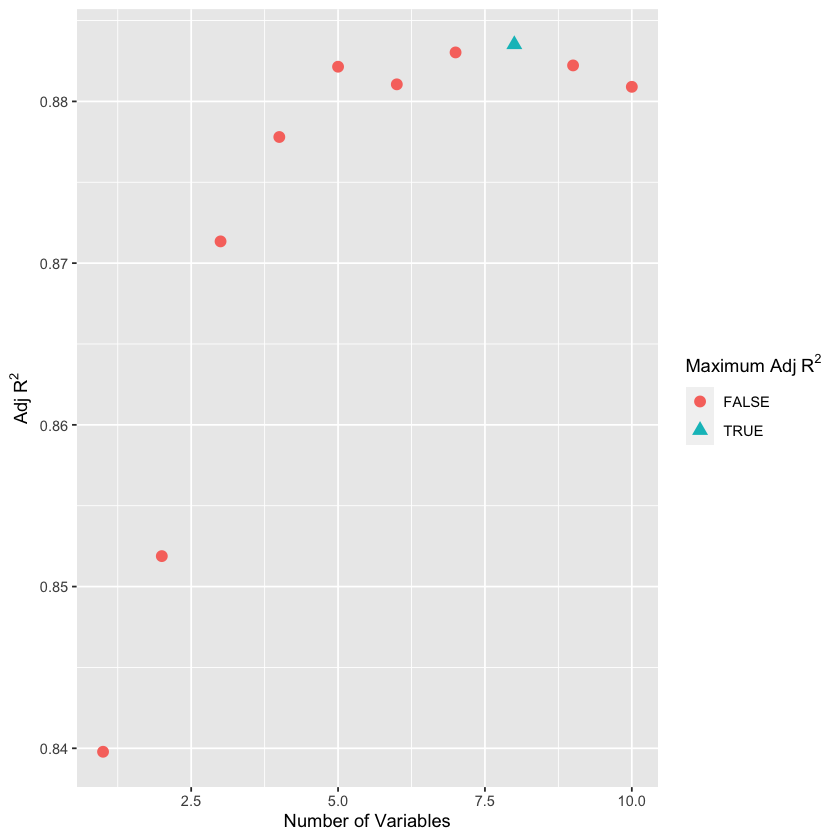

In [44]:
#Adj_R^2
adjr2.df = data.frame(numvar = numvar, adjr2 = regfit_back.summary$adjr2, maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(regfit_back.summary$adjr2)] = TRUE
ggplot(adjr2.df,aes(x = numvar,y = adjr2,shape = maxadjr2,col = maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

c) Compare your results from parts a and b with those of question 1.

> It is important to note that the models all match when n = 3 (as can be seen the graphics for the respective questions). However, throughout the question, each of the fittings returned a different preferred model. 
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [45]:
sim_dat_new <- function(n, beta){
    x = rnorm(n)
    e = rnorm(n)
    y <- beta * x + e
    return(data.frame(x, y))
}

train = sample(x = 1000, size = 100)
sim_dat_new_res <- sim_dat_new(1000, rnorm(1, 0))

head(sim_dat_new_res)

,x,y
,<dbl>,<dbl>
1,-0.7645217,0.1733490
2,-2.5520108,-1.3820729
3,-1.6765596,0.1277933
4,0.7045453,-0.3439282
5,-1.0182975,-1.0341150
6,-0.2995445,0.9674541


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [46]:
regfit.train <- regsubsets(y ~ poly(x, 20, raw = T), data = sim_dat_new_res, subset = train, nvmax = 20)
regfit.train_sum <- summary(regfit.train)
regfit.train_sum
attributes(regfit.train_sum)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 20, raw = T), data = sim_dat_new_res, 
    subset = train, nvmax = 20)
20 Variables  (and intercept)
                       Forced in Forced out
poly(x, 20, raw = T)1      FALSE      FALSE
poly(x, 20, raw = T)2      FALSE      FALSE
poly(x, 20, raw = T)3      FALSE      FALSE
poly(x, 20, raw = T)4      FALSE      FALSE
poly(x, 20, raw = T)5      FALSE      FALSE
poly(x, 20, raw = T)6      FALSE      FALSE
poly(x, 20, raw = T)7      FALSE      FALSE
poly(x, 20, raw = T)8      FALSE      FALSE
poly(x, 20, raw = T)9      FALSE      FALSE
poly(x, 20, raw = T)10     FALSE      FALSE
poly(x, 20, raw = T)11     FALSE      FALSE
poly(x, 20, raw = T)12     FALSE      FALSE
poly(x, 20, raw = T)13     FALSE      FALSE
poly(x, 20, raw = T)14     FALSE      FALSE
poly(x, 20, raw = T)15     FALSE      FALSE
poly(x, 20, raw = T)16     FALSE      FALSE
poly(x, 20, raw = T)17     FALSE      FALSE
poly(x, 20, raw = T)18     FALSE      FALSE
po

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*